# <a id='toc1_'></a>[Simulation](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Simulation](#toc1_)    
  - [Introduction](#toc1_1_)    
  - [Théorie](#toc1_2_)    
    - [Populations atomiques](#toc1_2_1_)    
    - [Populations moléculaires rovibroniques](#toc1_2_2_)    
    - [Facteurs de renforcement des raies](#toc1_2_3_)    
    - [Alternance d’intensité et spin nucléaire](#toc1_2_4_)    
    - [Modèles numériques](#toc1_2_5_)    
    - [Facteurs de Franck-Condon et de Höln-London](#toc1_2_6_)    
    - [Facteur de Franck et Condon](#toc1_2_7_)    
    - [Le facteur de Höln-London $S_{J''}^{J' \Lambda' \Lambda''}$](#toc1_2_8_)    
      - [1 - Pour les transitions $N_2(B^3\Pi_g, \nu') \rightarrow N_2(A^3\Sigma_u^+, \nu'') + h\nu$](#toc1_2_8_1_)    
      - [2 - Pour les transitions $ N_2(C^3\Pi_u, \nu') \rightarrow N_2(B^3\Pi_g, \nu'') + h\nu $](#toc1_2_8_2_)    
      - [3 - Pour les transitions $ N_2^+(B^2\Sigma_u^+, \nu') \rightarrow N_2^+(X^2\Sigma_g^+, \nu'') + h\nu $](#toc1_2_8_3_)    
    - [Probabilité de transition](#toc1_2_9_)    
    - [Molecular Energy Levels](#toc1_2_10_)    
      - [Vibrational Energy](#toc1_2_10_1_)    
      - [Rotational Energy](#toc1_2_10_2_)    
  - [Simulation](#toc1_3_)    
  - [Vibrational transitions](#toc1_4_)    
  - [Rotational transitions](#toc1_5_)    
    - [Without the Hund rules](#toc1_5_1_)    
    - [With the Hund rules](#toc1_5_2_)    
  - [Adding broadening](#toc1_6_)    
      - [Some slit functions ...](#toc1_6_1_1_)    
    - [Continuous spectrum - for v'=0 -> v''=0 only](#toc1_6_2_)    
    - [Compare the simulation with and without taking account of the degenerescency of the rotational levels](#toc1_6_3_)    
    - [Whole spectrum](#toc1_6_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Introduction](#toc0_)

This notebook explores the simulation of molecular transitions, focusing on vibrational and rotational energy levels. It provides a detailed theoretical background, including the principles of molecular energy levels, transition probabilities, and spectral line intensities. The notebook also includes practical implementations for calculating and visualizing vibrational and rotational transitions, as well as the effects of broadening on spectral lines.

The workflow is structured as follows:
1. **Theoretical Background**: A comprehensive explanation of molecular energy levels, transition probabilities, and factors influencing spectral intensities.
2. **Vibrational Transitions**: Calculation and visualization of vibrational transitions between energy levels.
3. **Rotational Transitions**: Analysis of rotational transitions and their contribution to the spectrum.
4. **Broadening Effects**: Application of various slit functions (Gaussian, Lorentzian, Voigt, etc.) to simulate broadening effects on the spectrum.
5. **Whole Spectrum Simulation**: Generation of the complete spectrum for specific molecular transitions, incorporating vibrational and rotational levels.

This notebook combines theoretical insights with computational tools to provide a holistic understanding of molecular spectroscopy and its applications.


## <a id='toc1_2_'></a>[Théorie](#toc0_)

### <a id='toc1_2_1_'></a>[Populations atomiques](#toc0_)

Pour un atome, la population $n_u$ d’un niveau d’énergie $E_u$ est donnée par la loi de Boltzmann :

$$
n_u = n_\text{total} \cdot \frac{g_u}{Z} \exp\left( -\frac{E_u}{k_B T} \right) 
$$

où :

- $n_\text{total}$ est la population totale de l’espèce atomique,
- $g_u = 2J + 1$ est le poids statistique du niveau $u$,
- $Z = \sum_i g_i \exp(-E_i / k_B T)$ est la fonction de partition,
- $k_B$ est la constante de Boltzmann,
- $T$ est la température électronique.

On peut généraliser ce résultat dans le cas d'une molécule (dans notre cas, la molécule de $N_2$), en considérant cette fois-ci les niveaux électroniques, mais également rotationnels et vibrationnels.

---

### <a id='toc1_2_2_'></a>[Populations moléculaires rovibroniques](#toc0_)

Pour les molécules, si l’on suppose que les températures électroniques, vibrationnelles et rotationnelles sont différentes, la population d’un niveau $(e', v', J')$ est donnée par :

$$
n_{e'v'J'} = n_\text{total} \cdot \frac{g_{e'} \cdot (2J'+1) \cdot L(J',P_{ef}',P_{gu}')}{\sigma Z} \exp\left( -\frac{E_{e'}}{kT_\text{el}} - \frac{E_{v'}}{kT_\text{vib}} - \frac{E_{J'}}{kT_\text{rot}} \right)
$$

avec :

- $g_{e'} = (2S+1)(2 - \delta_{0,\Lambda})$, dégénérescence électronique,
- $L(J',P_{ef}',P_{gu}')$ est un facteur dû au spin nucléaire (valant 2 pour les molécules homonucléaires, 1 sinon),
- $Z = \sum_{e,v,J} g_e (2J+1) \exp\left[-\frac{T_e}{kT_\text{el}} - \frac{G(v)}{kT_\text{vib}} - \frac{F(J)}{kT_\text{rot}}\right]$ est la fonction de partition totale,
- $T_\text{el}, T_\text{vib}, T_\text{rot}$ sont les températures électroniques, vibrationnelles et rotationnelles respectivement.


L’intensité d’une raie spectrale est liée à la transition entre deux niveaux d’énergie d’une espèce (atome ou molécule). Elle dépend de la population du niveau supérieur, du coefficient d’Einstein $ A_{ul} $, et de la forme de raie. Pour une espèce atomique on obtient :

$$
\varepsilon_\lambda = \frac{A_{ul} n_u(E_u-E_l)}{4\pi} \phi(\lambda)
$$

et pour une espèce moléculaire, on aura de même :

$$
\varepsilon_\lambda =n_{e'v'J'} \frac{A_{e'v'J'-e''v''J''}}{4\pi} (T_{e'v'J'}-T_{e''v''J''}) \phi(\lambda)
$$

où :
- $ \varepsilon_\lambda $ est le coefficient d’émission spectrale (W·m$^{-3}$·sr$^{-1}$·nm$^{-1}$),
- $ h $ est la constante de Planck,
- $ c $ est la vitesse de la lumière,
- $ A_{ul} $ est le coefficient d’Einstein de transition $ u \rightarrow l $,
- $ n_u $ est la population du niveau supérieur $ u $,
- $ \phi(\lambda) $ est la fonction de forme de raie (normalisée).

### <a id='toc1_2_3_'></a>[Facteurs de renforcement des raies](#toc0_)

L’intensité observée d’un ensemble de raies d’une bande moléculaire dépend :
- du moment de transition électronique $ |\Re|^2 $,
- du facteur de Franck-Condon (distribution entre bandes vibrationnelles),
- du facteur de renforcement rotationnel $ S_{J'J''} $.

Ainsi, l’intensité d’une transition vibrationnelle-rotationnelle est donnée par :

$$
I_{J'J''}^{v'v''} \propto |\Re|^2 \cdot q_{v'v''} \cdot S_{J'J''}
$$

où :
- $ q_{v'v''} $ est le facteur de Franck-Condon (entre états vibrationnels $ v', v'' $),
- $ S_{J'J''} $ est le facteur de force de raie rotationnelle,
- $ |\Re|^2 $ reflète la force intrinsèque de la transition électronique.

Notons que la littérature donne des expressions explicites des coefficients d'Einstein dans le cas d'une molécule, ce qui fait apparaître certains éléments développés rapidement ci-dessous, mais sur lesquels nous nous sommes peu attardés dans notre travail :

$$
A_{e'v'J'-e''v''J''}=\frac{65\pi^4\nu^3}{3\epsilon_0hc^3}|\mu_{e'v'J'-e''v''J''}|^2=\frac{65\pi^4\nu^3}{3\epsilon_0hc^3(2-\delta_{0,\Lambda '})(2S+1)}|R_e^{v'v''}|^2 \frac{S_{J'J''}}{2J'+1}
$$

où $ S_{J'J''} $ est le facteur de renforcement rotationnel, $ \mu_{e'v'J'-e''v''J''} $ est le moment dipolaire de transition et $ |R_e^{v'v''}|^2 $ est le carré du moment dipolaire de transition électonico-vibrationnelle.

### <a id='toc1_2_4_'></a>[Alternance d’intensité et spin nucléaire](#toc0_)

Pour les molécules diatomiques homonucléaires, l’alternance d’intensité entre niveaux vient du couplage avec le spin nucléaire. Le facteur de ligne $ L(J, P_{ef}, P_{gu}) $ ajuste l’intensité selon :

$$
L = P_{ef} \cdot P_{gu} \cdot (-1)^{J^*}
$$

avec :
- $ J^* = J $ si $ J $ est entier, $ J - \frac{1}{2} $ si demi-entier,
- $ P_{ef} $, $ P_{gu} $ : parités et symétries de l'état,
- et un facteur multiplicatif dépendant du spin nucléaire (0 pour $ ^{16}O $, 1 pour $ ^{14}N $, etc.).

### <a id='toc1_2_5_'></a>[Modèles numériques](#toc0_)

Les codes tels que `NEQAIR` ou `SPECAIR` utilisent une approche ligne par ligne (line-by-line) pour modéliser l’intensité des raies, incluant tous les facteurs de transition, répartitions statistiques, et formes de raie.



### <a id='toc1_2_6_'></a>[Facteurs de Franck-Condon et de Höln-London](#toc0_)

L'intensité $ I_{\nu' \nu''} $ émise par le plasma lors de la désexcitation radiative d'un état électronique $ A_2(Z,m,\nu',J',L') $ vers un état électronique $ A_2(Y,n,\nu'',J'',L'') $ est donnée par la relation :

$$
I_{\nu' \nu''} = C_2 \, h \nu'_{\nu''} \, [A_2(Z,\nu')] \, A_{\nu' \nu''}
$$

où :
- $ A_2(Y) $ est un état électronique de la molécule $ A_2 $,
- $ A_2(Z) $ un état électronique de la molécule $ A_2 $ d'énergie supérieure à l'état électronique $ A_2(Y) $,
- $ m $ et $ n $ les nombres quantiques principaux,
- $ \nu' $ et $ \nu'' $ les nombres quantiques de vibration,
- $ J' $ et $ J'' $ les nombres quantiques de rotation,
- $ L' $ et $ L'' $ les nombres quantiques axiaux,
- $ [A_2(Z,\nu')] $ est le nombre de molécules par unité de volume dans l'état électronique supérieur, $ A_2(Z,\nu') $ désignant respectivement les états $ N_2(C^3\Pi_u) $, $ N_2(B^3\Pi_g) $ et $ N_2^+(B^2\Sigma_u^+) $, $ A_2(Y,\nu'') $ les états $ N_2(B^3\Pi_g) $, $ N_2(A^3\Sigma_u^+) $ et $ N_2^+(X^2\Sigma_g^+) $,
- $ C_2 $ est une constante géométrique dépendant du volume émetteur observé,
- $ h \nu'_{\nu''} $ est l'énergie du photon émis,
- $ A_{\nu' \nu''} $ est la probabilité de transition.

---

$ A_{\nu' \nu''} $ s'exprime par :

$$
A_{\nu' \nu''} = \frac{64 \pi^4 {\nu'}_{\nu'-\nu''}^3}{3hc^3 g_m (2J'+1)} S^{m' \nu' J' \Lambda'}_{m'' \nu'' J'' \Lambda''}
$$

où :
- $ g_m $ est le poids statistique du niveau $ A_2(Z,m) $,
- $ c $ la vitesse de la lumière,
- $ h $ la constante de Planck.

---

Le terme $ S^{m' \nu' J' \Lambda'}_{m'' \nu'' J'' \Lambda''} $ peut se décomposer en deux termes, l'un de rotation, l'autre de vibration :

$$
S^{m' \nu' J' \Lambda'}_{m'' \nu'' J'' \Lambda''} = S^{J' \Lambda'}_{J'' \Lambda''} \, p_{\nu' \nu''}
$$

---

$ p_{\nu' \nu''} $ est donné par l'expression :

$$
p_{\nu' \nu''} = \sum_{ij} \left| \int \Psi_{\nu'}(Z) \, R_{ij} \, \Psi_{\nu''}(Y) \, dr \right|^2
$$

qui peut se séparer en deux facteurs :

$$
p_{\nu' \nu''} = q_{\nu' \nu''} \sum_{ij} |R_{ij}|^2
$$



où : $q_{\nu' \nu''}$ dépend de la transition vibrationnelle et $\sum_{ij} |R_{ij}|^2$ dépend essentiellement de la transition électronique.

Pour une transition électronique donnée, la quantité $\sum_{ij} |R_{ij}|^2$ dépend aussi bien de la distance internucléaire que de l'état vibrationnel. Néanmoins, cette dépendance est plus faible que celle de $q_{\nu' \nu''}$ avec $\nu'$ et $\nu''$, et l'on peut écrire :

$$
\sum_{ij} |R_{ij}|^2 = |R_{mn}^{'m} (r_{\nu' \nu''})|^2
$$

$R_{mn}^{'}$ est le moment de transition électronique et dépend du R-centréïde $r_{\nu' \nu''}$ qui peut être calculé à partir de la courbe de potentiel :

$$
r_{\nu' \nu''} = \frac{\int \Psi_{\nu'}(Z) \, \Psi_{\nu''}(Y) \, r \, dr}{\int \Psi_{\nu'}(Z) \, \Psi_{\nu''}(Y) \, dr}
$$

---

### <a id='toc1_2_7_'></a>[Facteur de Franck et Condon](#toc0_)

$q_{\nu' \nu''}$, le facteur de Franck et Condon, s'exprime ainsi :

$$
q_{\nu' \nu''} = \left| \int \Psi_{\nu'}(Z) \, \Psi_{\nu''}(Y) \, dr \right|^2
$$

---

### <a id='toc1_2_8_'></a>[Le facteur de Höln-London $S_{J''}^{J' \Lambda' \Lambda''}$](#toc0_)

s'exprime pour l'azote :

#### <a id='toc1_2_8_1_'></a>[1 - Pour les transitions $N_2(B^3\Pi_g, \nu') \rightarrow N_2(A^3\Sigma_u^+, \nu'') + h\nu$](#toc0_)

$$
\Lambda' = 1, \quad \Lambda'' = 0, \quad \Delta \Lambda = 1
$$

- $J'' = J' - 1$ branche R :

$$
S_{J''}^{J' \Lambda' \Lambda''} = \frac{(J' + \Lambda')(J' - 1 + \Lambda')}{4J'} = \frac{J' + 1}{4}
$$

- $J'' = J'$ branche Q :

$$
S_{J''}^{J' \Lambda' \Lambda''} = \frac{(J' + \Lambda')(J' + 1 - \Lambda')(2J' + 1)}{4J'(J'+1)} = \frac{2J'+1}{4}
$$

- $J'' = J' + 1$ branche P :

$$
S_{J''}^{J' \Lambda' \Lambda''} = \frac{(J' + 1 - \Lambda')(J' + 2 - \Lambda')}{4(J'+1)} = \frac{J'}{4}
$$


#### <a id='toc1_2_8_2_'></a>[2 - Pour les transitions $ N_2(C^3\Pi_u, \nu') \rightarrow N_2(B^3\Pi_g, \nu'') + h\nu $](#toc0_)

$$
\Lambda' = 1, \quad \Lambda'' = 1, \quad \Delta \Lambda = 0
$$ 

- $ J'' = J' - 1 $ branche R :

$$
S_{J''}^{J'\Lambda'\Lambda''} = \frac{(J' + \Lambda')(J' - \Lambda')}{J'} = \frac{J'^2 - 1}{J'}
$$

- $ J'' = J' $ branche Q :

$$
S_{J''}^{J'\Lambda'\Lambda''} = \frac{(2J'+1)\Lambda'^2}{J'(J'+1)} = \frac{2J'+1}{J'(J'+1)}
$$

- $ J'' = J' + 1 $ branche P :

$$
S_{J''}^{J'\Lambda'\Lambda''} = \frac{(J'+1+\Lambda')(J'+1-\Lambda')}{J'+1} = \frac{J'(J'+2)}{J'+1}
$$

---

#### <a id='toc1_2_8_3_'></a>[3 - Pour les transitions $ N_2^+(B^2\Sigma_u^+, \nu') \rightarrow N_2^+(X^2\Sigma_g^+, \nu'') + h\nu $](#toc0_)

$$
\Lambda' = 0, \quad \Lambda'' = 0, \quad \Delta \Lambda = 0
$$

- $ J'' = J' - 1 $ branche R :

$$
S_{J''}^{J'\Lambda'\Lambda''} = \frac{(J' + \Lambda')(J' - \Lambda')}{J'} = J'
$$

- $ J'' = J' $ pas de branche Q

- $ J'' = J' + 1 $ branche P :

$$
S_{J''}^{J'\Lambda'\Lambda''} = \frac{(J'+1+\Lambda')(J'+1-\Lambda')}{J'+1} = J'+1
$$

---

### <a id='toc1_2_9_'></a>[Probabilité de transition](#toc0_)

La probabilité de transition que nous noterons $ A_{\nu' \nu''} $ peut donc s'écrire sous la forme :

$$
A_{\nu' \nu''} = C_3 \, |R_{mn}|^2 \, \frac{q_{\nu' \nu''}}{{\lambda_{\nu' \nu''}}^3}
$$

L'intensité émise par le plasma s'exprime :

$$
I_{\nu' \nu''} = C_1 \, h \nu'_{\nu''} \, \frac{|R_{mn}|^2 \, q_{\nu' \nu''}}{{\lambda_{\nu' \nu''}}^3} \, [A_2(Z,\nu')]
$$


### <a id='toc1_2_10_'></a>[Molecular Energy Levels](#toc0_)

#### <a id='toc1_2_10_1_'></a>[Vibrational Energy](#toc0_)

$G(v)$ the energy of the vibrational level $v$ within the limits of the electronic state,

$$G(v) = \omega_e(v + 1/2) - \omega_e x_e(v + 1/2)^2; \tag{D.2}$$

#### <a id='toc1_2_10_2_'></a>[Rotational Energy](#toc0_)

$F_v(J)$ the energy of a rotational level within the limits of the vibrational level $v$,

$$F_v(J) = B_v J(J+1) - D_v J^2(J+1)^2, \tag{D.3}$$

where $\omega_e$ and $\omega_e x_e$ are vibrational constants and $B_v$ is the rotational constant for the level $v$,

$$B_v = B_e - \alpha_e(v + 1/2); \quad D_v = D_e + \beta_e(v + 1/2)$$

Malheureusement on a pas accès à ces facteurs correctifs (https://webbook.nist.gov/cgi/cbook.cgi?ID=C7727379&Mask=1000)

## <a id='toc1_3_'></a>[Simulation](#toc0_)

On s'intéresse ici à la transition : $C^3\Pi(v'=0,1,2,3) \rightarrow B^3 \Pi_g(v''=0,1,2,3)$

In [1]:
import numpy as np
import scipy as sp
from scipy import constants as const
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("../src")
import xspectra.utils as utils
import xspectra.simulation as sim

## <a id='toc1_4_'></a>[Vibrational transitions](#toc0_)

In [3]:
# On récolte alors toutes les transitions possibles
nb_levels = 5
transitions = [[] for _ in range(nb_levels)]
for v1 in range(0, nb_levels):
    for v2 in range(0, nb_levels):
        delta = (sim.energy_function_C3P(v=v1, j=0, in_cm=False)[-1] - sim.energy_function_B3P(v=v2, j=0, in_cm=False)[-1])
        if delta > 0:
            transitions[v2].append(10**9 * const.h * const.c / delta)
        print(f"Transition {v1} -> {v2} : {delta/const.e:4.2f} eV - {10**9 * const.h * const.c / delta:3.2f} nm")
        
transitions = np.array(transitions)

Transition 0 -> 0 : 3.68 eV - 337.03 nm
Transition 0 -> 1 : 3.47 eV - 357.58 nm
Transition 0 -> 2 : 3.26 eV - 380.39 nm
Transition 0 -> 3 : 3.05 eV - 405.84 nm
Transition 0 -> 4 : 2.85 eV - 434.41 nm
Transition 1 -> 0 : 3.93 eV - 315.84 nm
Transition 1 -> 1 : 3.71 eV - 333.82 nm
Transition 1 -> 2 : 3.51 eV - 353.62 nm
Transition 1 -> 3 : 3.30 eV - 375.51 nm
Transition 1 -> 4 : 3.10 eV - 399.84 nm
Transition 2 -> 0 : 4.17 eV - 297.67 nm
Transition 2 -> 1 : 3.95 eV - 313.58 nm
Transition 2 -> 2 : 3.75 eV - 330.99 nm
Transition 2 -> 3 : 3.54 eV - 350.09 nm
Transition 2 -> 4 : 3.34 eV - 371.15 nm
Transition 3 -> 0 : 4.40 eV - 281.92 nm
Transition 3 -> 1 : 4.19 eV - 296.16 nm
Transition 3 -> 2 : 3.98 eV - 311.63 nm
Transition 3 -> 3 : 3.77 eV - 328.51 nm
Transition 3 -> 4 : 3.57 eV - 346.98 nm
Transition 4 -> 0 : 4.62 eV - 268.16 nm
Transition 4 -> 1 : 4.41 eV - 281.01 nm
Transition 4 -> 2 : 4.20 eV - 294.91 nm
Transition 4 -> 3 : 4.00 eV - 309.98 nm
Transition 4 -> 4 : 3.80 eV - 326.38 nm


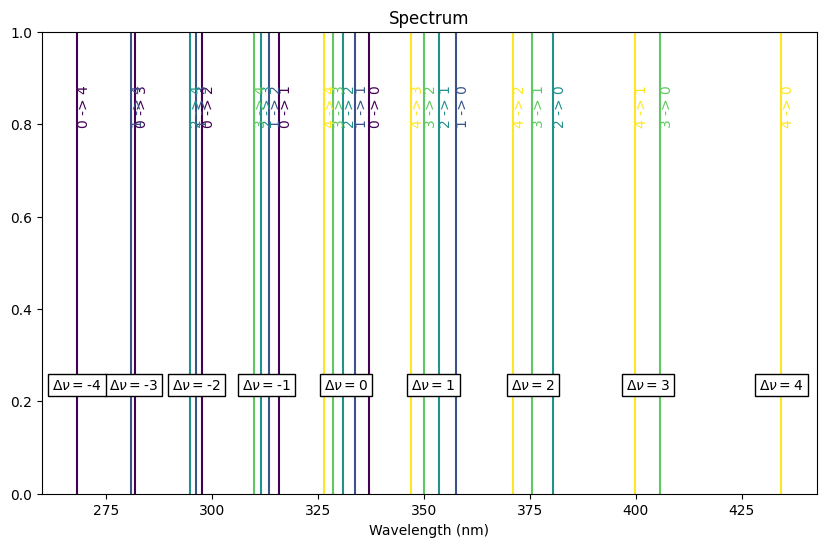

In [4]:
plt.figure(figsize=(10, 6))

plt.xlabel('Wavelength (nm)')
# plt.ylabel('Intensity')

# Accolades pour marquer les deltas i de transitions
min_subset = np.ones(len(transitions)*2)*np.max(transitions) # on stocke la valeur minimale du subset Delta_v = k à l'indice 2*abs(k)+signe(k)
max_subset = np.zeros(len(transitions)*2) # on stocke la valeur maximale du subset Delta_v = k à l'indice 2*abs(k)+signe(k)
diffs = np.ones(len(transitions)*2, dtype=int)# on stocke la valeur de k à l'indice 2*abs(k)+signe(k)

colors = plt.cm.viridis(np.linspace(0, 1, nb_levels))
for i, t in enumerate(transitions):
    for j, value in enumerate(t):
        
        
        diff = abs(i-j)
        if diff == 0:
            sign01 = 1
        else:
            sign01 = (np.sign(i-j)+1)//2 
            
        
        min_subset[2*diff+sign01] = min(min_subset[2*diff+sign01], value)
        max_subset[2*diff+sign01] = max(max_subset[2*diff+sign01], value)
        
        diffs[2*diff+sign01] = i-j
        
        plt.axvline(x=value, linestyle='-', color=colors[i])
        # Ajout d'une étiquette pour marquer les transitions
        plt.text(value, 0.8, f'{i} -> {j}', rotation=90, color=colors[i])



min_subset = min_subset[1:]
max_subset = max_subset[1:]
diffs = diffs[1:]

mean = (max_subset + min_subset)/2
delta = (max_subset - min_subset)/2
delta_max = np.max(delta)

for i, (m,d) in enumerate(zip(mean, delta)):
    # il faut retrouver l'emplacement de m relativement à la figure
    # il faut donc d'abord récupérer l'axe des x
    ax = plt.gca()
    x = ax.get_xlim()

    position_x = (m-x[0])/(x[1]-x[0])
    
    plt.text(position_x, 0.25, r'$\Delta \nu =$'+f"{diffs[i]:1d}", fontsize=10, ha='center', va='top', transform=plt.gca().transAxes,
             bbox=dict(boxstyle='square', fc='white', color='k'))


plt.savefig('./res/spectrum_vib.png')
plt.title('Spectrum')
plt.show()

## <a id='toc1_5_'></a>[Rotational transitions](#toc0_)

### <a id='toc1_5_1_'></a>[Without the Hund rules](#toc0_)

In [5]:
probas = []
wavelengths_transitions = []

nb_rot_levels = 150
T=400 # K


v1, v2 = 0, 0
colors_PQR = {'P': 'r', 'Q': 'g', 'R': 'b'}


In [6]:

def plot_transition(ax, v1, j1, v2, j2, color):
    _,_,_,E_1 = sim.energy_function_C3P(v=v1, j=j1)
    _,_,_,E_2 = sim.energy_function_B3P(v=v2, j=j2)
    Delta_E = E_1 - E_2 # cm-1
    l = 1/Delta_E * (1e7) # (nm)  longueur d'onde
    n_1 = sim.population_distribution_B3P(v=v1, J=j1, T_el=T, T_rot=T, T_vib=T)

    prob = sim.get_transition_probability(l, n_1=n_1, L1=1, L2=1, v1=v1, v2=v2, J1=j1, J2=j2)
    
    wavelengths_transitions.append(l)
    probas.append(prob)
    
    # print(n_1, prob, l)
    ax.plot([l,l], [0, prob], '-', color=color)

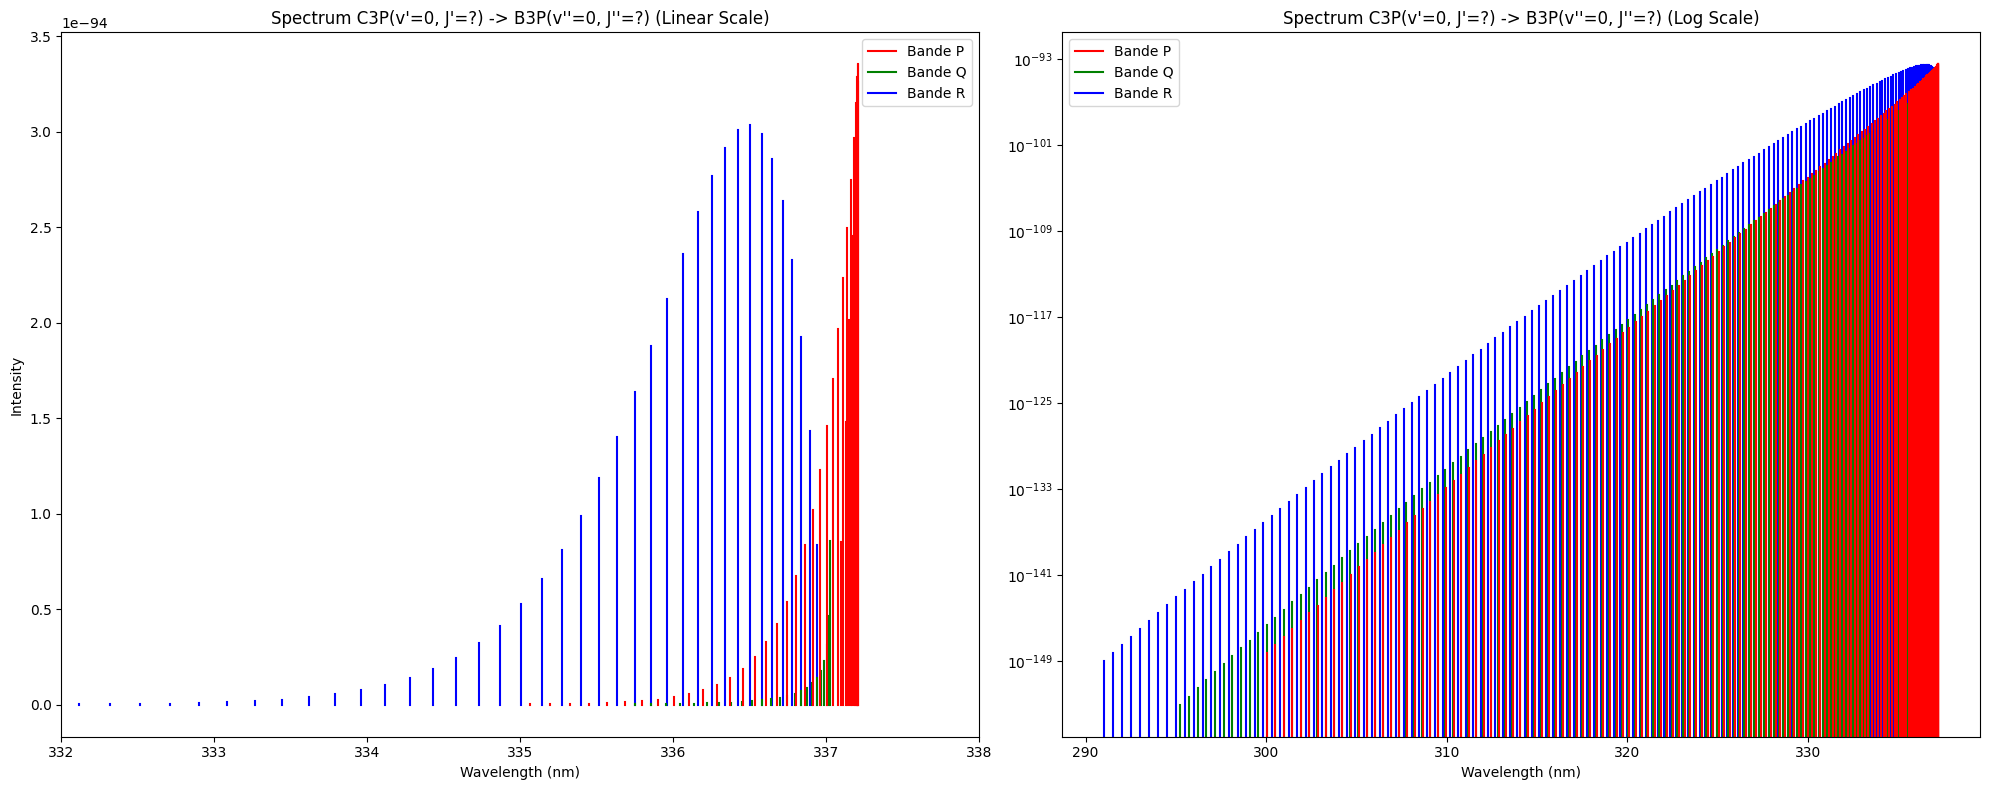

In [7]:
# On crée une figure avec deux sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Premier graphique (échelle linéaire)
axes[0].set_xlabel('Wavelength (nm)')
axes[0].set_ylabel('Intensity')
axes[0].set_title(f"Spectrum C3P(v'={v1}, J'=?) -> B3P(v''={v2}, J''=?) (Linear Scale)")
for i in range(0, nb_rot_levels):
    if i-1 >= 0:
        j1, j2 = i, i-1  # Raie R
        plot_transition(axes[0], v1, j1, v2, j2, colors_PQR['R'])
    if i+1 < nb_rot_levels:
        j1, j2 = i, i+1  # Raie P
        plot_transition(axes[0], v1, j1, v2, j2, colors_PQR['P'])
    if i > 0:
        plot_transition(axes[0], v1, i, v2, i, colors_PQR['Q'])  # Raie Q
axes[0].legend(handles=[
    plt.Line2D([0], [0], color=item, label=f'Bande {key}') for key, item in colors_PQR.items()
])
axes[0].set_xlim((332, 338))



# Deuxième graphique (échelle logarithmique)
axes[1].set_xlabel('Wavelength (nm)')
axes[1].set_title(f"Spectrum C3P(v'={v1}, J'=?) -> B3P(v''={v2}, J''=?) (Log Scale)")
for i in range(0, nb_rot_levels):
    if i-1 >= 0:
        j1, j2 = i, i-1  # Raie R
        plot_transition(axes[1], v1, j1, v2, j2, colors_PQR['R'])
    if i+1 < nb_rot_levels:
        j1, j2 = i, i+1  # Raie P
        plot_transition(axes[1], v1, j1, v2, j2, colors_PQR['P'])
    if i > 0:
        plot_transition(axes[1], v1, i, v2, i, colors_PQR['Q'])  # Raie Q
axes[1].legend(handles=[
    plt.Line2D([0], [0], color=item, label=f'Bande {key}') for key, item in colors_PQR.items()
])
axes[1].set_yscale('log')

plt.tight_layout()
plt.savefig('./res/spectrum_rot_dual.png')
plt.show()

### <a id='toc1_5_2_'></a>[With the Hund rules](#toc0_)

Nous pouvons également prendre en compte les règles de Hund pour faire une levée de défénérescence sur les niveaux rotationnels. En effet chaque niveau est dégénéré $g_{el}=(2S+1)\times (2-\delta_{0, \Lambda})$ et l'énegie du niveau rotationnel s'écrit : 

$$E_{rot} = B_e J (J+1) + \lambda \Lambda \Omega \pm q (J+\frac{1}{2})$$

Avec : 
- $J$ le niveau rotationnel de l'état
- $\lambda$ le paramètre de couplage spin orbite (attention à la notation - ne pas confondre avec la longueur d'onde). Il vaut environ $18\,cm^{-1}$ pour l'état $B^3\Pi_u$ et $6\,cm^{-1}$ pour $C^3\Pi_u$
- $\Lambda$ est le nomvre quantique orbital équivalent au nombre L pour les atomes
- $\Omega$ est la projection du moment angulaire totale sur l'axe internucléaire ($\Omega=\vert\Lambda+\Sigma\vert$ pour $\Sigma=-S, \dots,S-1,S$) et apparaît dans la notation : $^{2S+1}\Lambda_{\Omega}$ pour désigner les sous-états de spin
- $q$ est le paramètre de $\Lambda$-doubling, dont un ordre de grandeur est $AB_e/\Delta_E$, ce qui donne $q\approx \frac{A}{2(J+1)}$
- le signe du troisième terme dépend du signe de Omega$ : 
  - négatif si l'état est e
  - positif si l'état est f

Et il faut garder en tête les règles de transitions : 
- $\Delta S=0$
- $\Delta\Lambda \in \{0,\pm1\}$
- $u\leftrightarrow g$
- $\Sigma^+ \leftrightarrow \Sigma^+\quad \Sigma^- \leftrightarrow \Sigma^-$

![rotationnel](./data/levee_deg_rotationnel.png)

In [8]:

def plot_transition_deg_free(ax, v1, j1, v2, j2, Sigma=0, sign_state=0, color="red"):
    _,_,_,E_1 = sim.energy_function_C3P(v=v1, j=j1, Sigma=Sigma, sign_state=sign_state)
    _,_,_,E_2 = sim.energy_function_B3P(v=v2, j=j2, Sigma=Sigma, sign_state=sign_state)
    Delta_E = E_1 - E_2 # cm-1
    l = 1/Delta_E * (1e7) # (nm)  longueur d'onde
    n_1 = sim.population_distribution_B3P(v=v1, J=j1, T_el=T, T_rot=T, T_vib=T)

    prob = sim.get_transition_probability(l, n_1=n_1, L1=1, L2=1, v1=v1, v2=v2, J1=j1, J2=j2)
    
    wavelengths_transitions.append(l)
    probas.append(prob)
    
    # print(n_1, prob, l)
    ax.plot([l,l], [0, prob], '-', color=color)

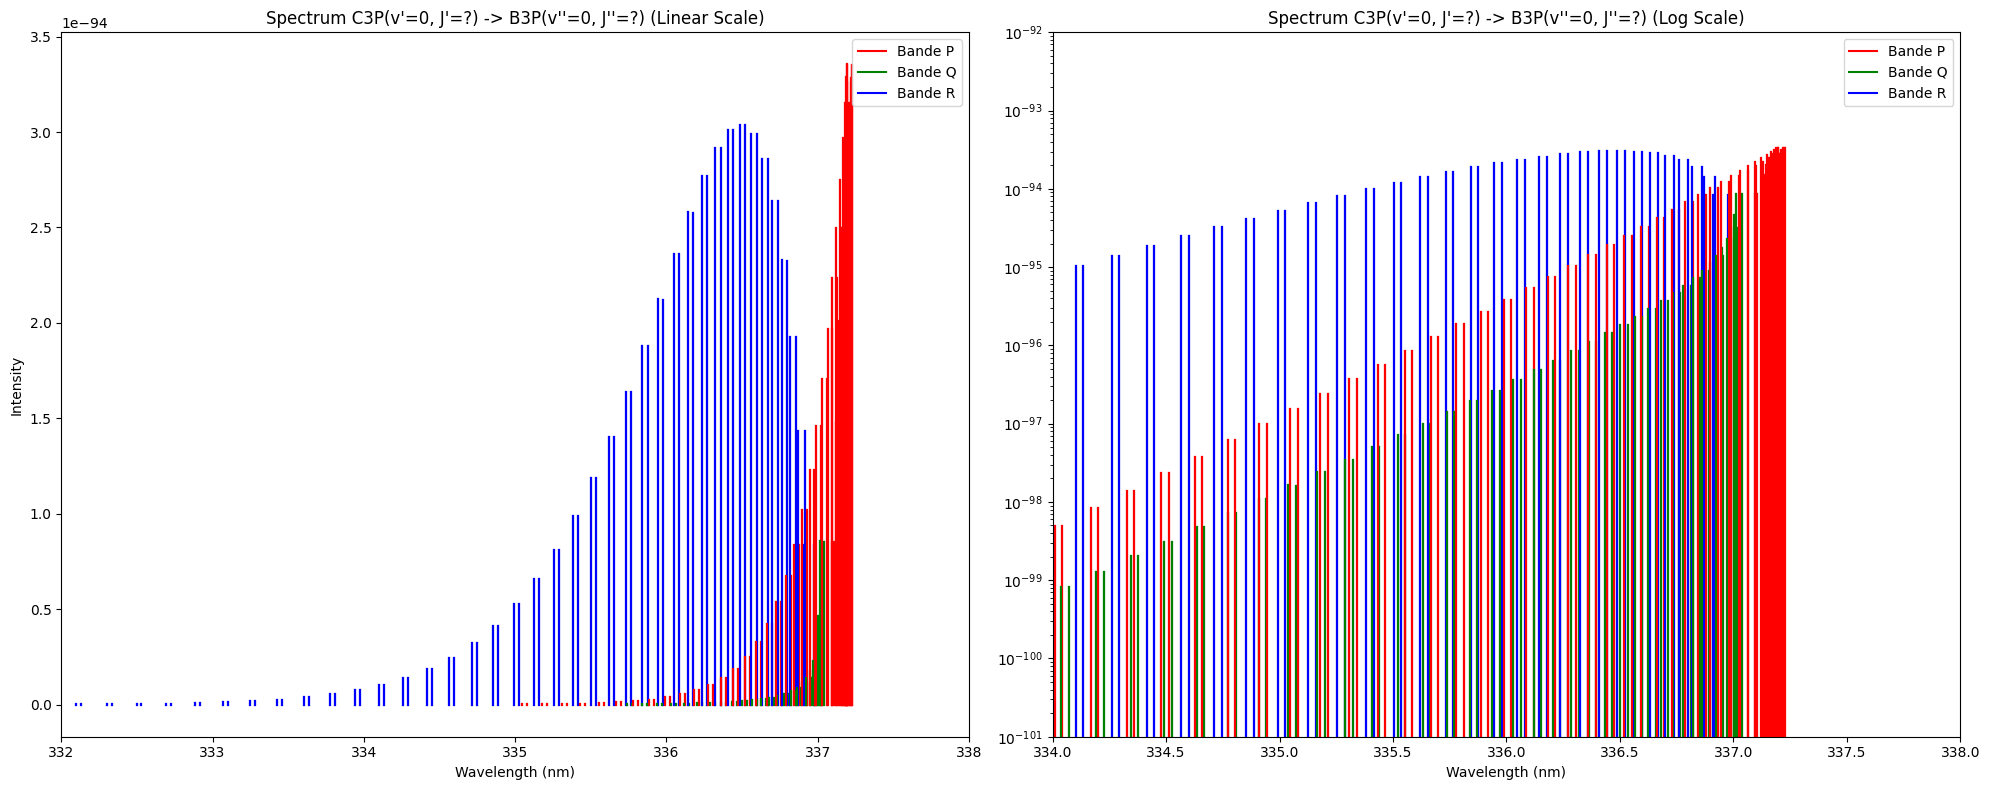

In [9]:
# On crée une figure avec deux sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Premier graphique (échelle linéaire)
axes[0].set_xlabel('Wavelength (nm)')
axes[0].set_ylabel('Intensity')
axes[0].set_title(f"Spectrum C3P(v'={v1}, J'=?) -> B3P(v''={v2}, J''=?) (Linear Scale)")
for Sigma in [-1,0,1]:
    for sign_state in [-1,1]:
        for i in range(0, nb_rot_levels):
            if i-1 >= 0:
                j1, j2 = i, i-1  # Raie R
                plot_transition_deg_free(axes[0], v1, j1, v2, j2, Sigma=Sigma, sign_state=sign_state, color=colors_PQR['R'])
            if i+1 < nb_rot_levels:
                j1, j2 = i, i+1  # Raie P
                plot_transition_deg_free(axes[0], v1, j1, v2, j2, Sigma=Sigma, sign_state=sign_state, color=colors_PQR['P'])
            if i > 0:
                plot_transition_deg_free(axes[0], v1, i, v2, i, Sigma=Sigma, sign_state=sign_state, color=colors_PQR['Q'])  # Raie Q
axes[0].legend(handles=[
    plt.Line2D([0], [0], color=item, label=f'Bande {key}') for key, item in colors_PQR.items()
])
axes[0].set_xlim((332, 338))



# Deuxième graphique (échelle logarithmique)
axes[1].set_xlabel('Wavelength (nm)')
axes[1].set_title(f"Spectrum C3P(v'={v1}, J'=?) -> B3P(v''={v2}, J''=?) (Log Scale)")
for Sigma in [-1,0,1]:
    for sign_state in [-1,1]:
        for i in range(0, nb_rot_levels):
            if i-1 >= 0:
                j1, j2 = i, i-1  # Raie R
                plot_transition_deg_free(axes[1], v1, j1, v2, j2, Sigma=Sigma, sign_state=sign_state, color=colors_PQR['R'])
            if i+1 < nb_rot_levels:
                j1, j2 = i, i+1  # Raie P
                plot_transition_deg_free(axes[1], v1, j1, v2, j2, Sigma=Sigma, sign_state=sign_state, color=colors_PQR['P'])
            if i > 0:
                plot_transition_deg_free(axes[1], v1, i, v2, i, Sigma=Sigma, sign_state=sign_state, color=colors_PQR['Q'])  # Raie Q
axes[1].legend(handles=[
    plt.Line2D([0], [0], color=item, label=f'Bande {key}') for key, item in colors_PQR.items()
])
axes[1].set_yscale('log')
axes[1].set_xlim((334, 338))
axes[1].set_ylim((1e-101, 1e-92))



plt.tight_layout()
plt.savefig('./res/spectrum_rot_dual.png')
plt.show()

## <a id='toc1_6_'></a>[Adding broadening](#toc0_)

#### <a id='toc1_6_1_1_'></a>[Some slit functions ...](#toc0_)

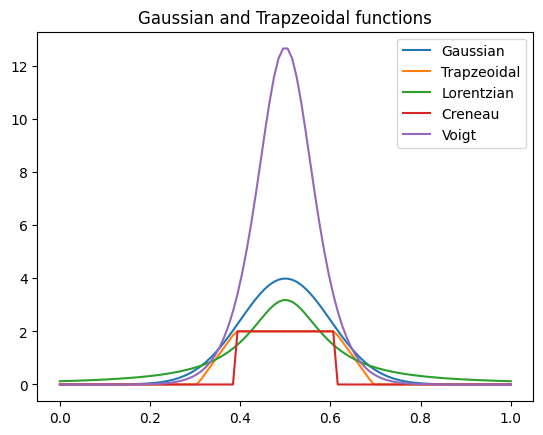

In [10]:
X = np.linspace(0, 1, 100)
plt.plot(X, sim.gaussian(X, 0.5), label='Gaussian')
plt.plot(X, sim.trapzezoidal(X, 0.5), label='Trapzeoidal')
plt.plot(X, sim.lorentzian(X, 0.5), label='Lorentzian')
plt.plot(X, sim.creneau(X, 0.5), label='Creneau')
plt.plot(X, sim.voigt(X, 0.5), label='Voigt')

plt.title('Gaussian and Trapzeoidal functions')
plt.savefig('./res/slit_functions.png')
plt.legend()

### <a id='toc1_6_2_'></a>[Continuous spectrum - for v'=0 -> v''=0 only](#toc0_)

This is without the Hund rule.

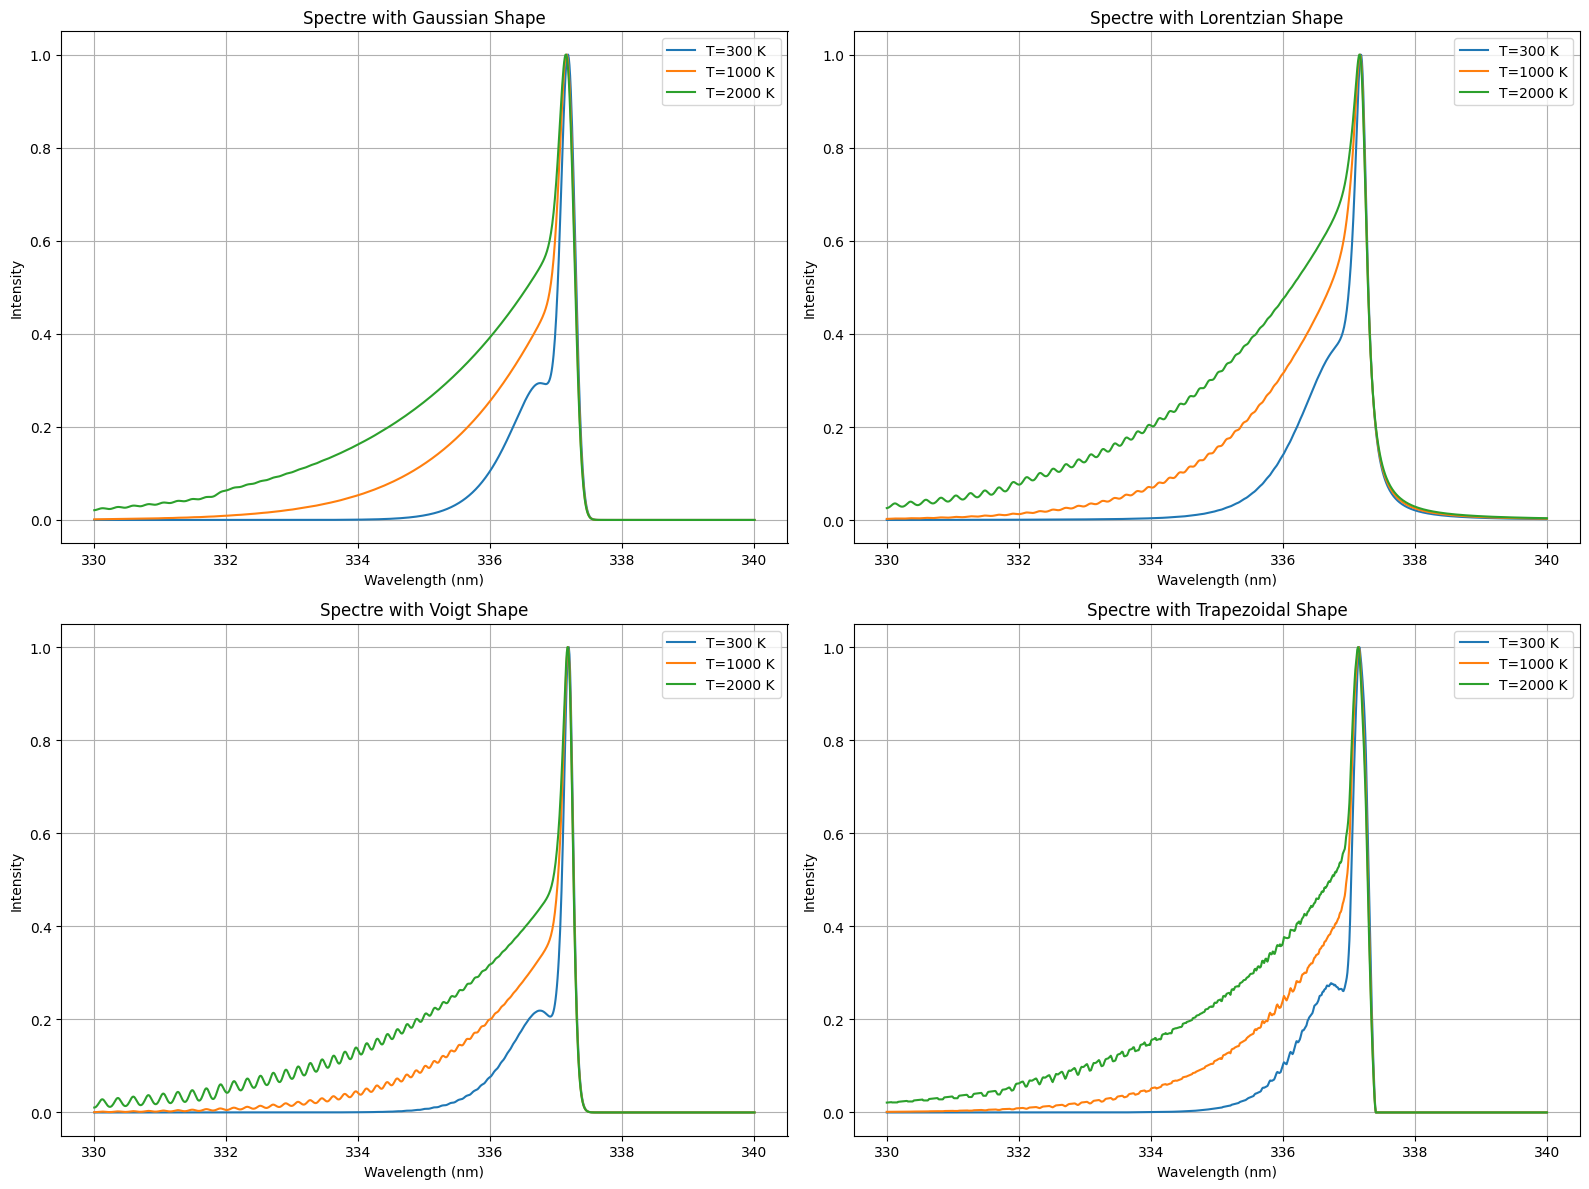

In [11]:
wavelengths = np.linspace(330, 340, 1000)  # nm

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

shapes = {
    "Gaussian": sim.gaussian,
    "Lorentzian": sim.lorentzian,
    "Voigt": sim.voigt,
    "Trapezoidal": sim.trapzezoidal
}

for ax, (shape_name, shape_func) in zip(axes.flatten(), shapes.items()):
    ax.set_title(f"Spectre with {shape_name} Shape")
    ax.set_xlabel("Wavelength (nm)")
    ax.set_ylabel("Intensity")
    
    spectrum = sim.get_spectrum(wavelengths, T_rot=300, shape=shape_func)
    ax.plot(wavelengths, spectrum, label=f"T=300 K")
    
    spectrum = sim.get_spectrum(wavelengths, T_rot=1000, shape=shape_func)
    ax.plot(wavelengths, spectrum, label=f"T=1000 K")
    
    spectrum = sim.get_spectrum(wavelengths, T_rot=2000, shape=shape_func)
    ax.plot(wavelengths, spectrum, label=f"T=2000 K")
    
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.savefig('./res/spectrum_shapes.png')
plt.show()

### <a id='toc1_6_3_'></a>[Compare the simulation with and without taking account of the degenerescency of the rotational levels](#toc0_)

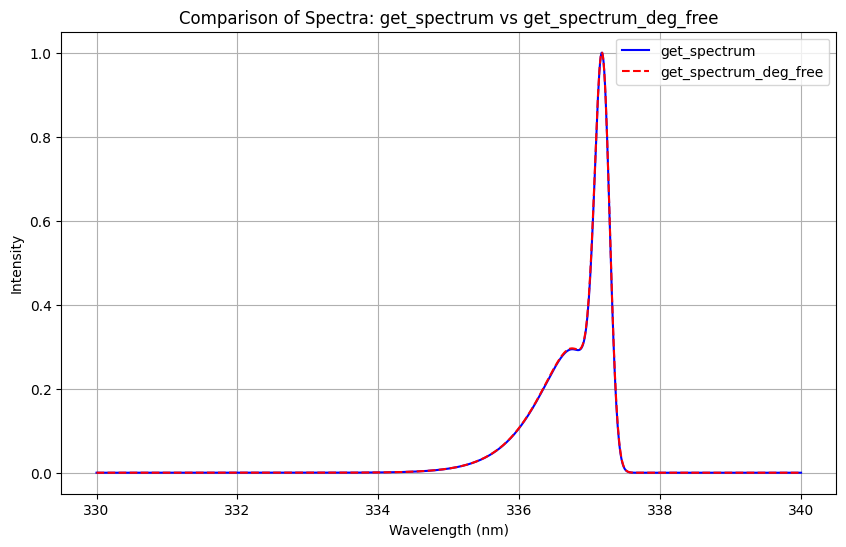

In [12]:
# Generate wavelengths
wavelengths = np.linspace(330, 340, 1000)  # nm

# Generate spectra
spectrum = sim.get_spectrum(wavelengths, T_rot=300, shape=sim.gaussian)
spectrum_deg_free = sim.get_spectrum_deg_free(wavelengths, T_rot=300, shape=sim.gaussian)

# Plot the spectra
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, spectrum, label="get_spectrum", color="blue")
plt.plot(wavelengths, spectrum_deg_free, label="get_spectrum_deg_free", color="red", linestyle="--")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.title("Comparison of Spectra: get_spectrum vs get_spectrum_deg_free")
plt.legend()
plt.grid()
plt.show()

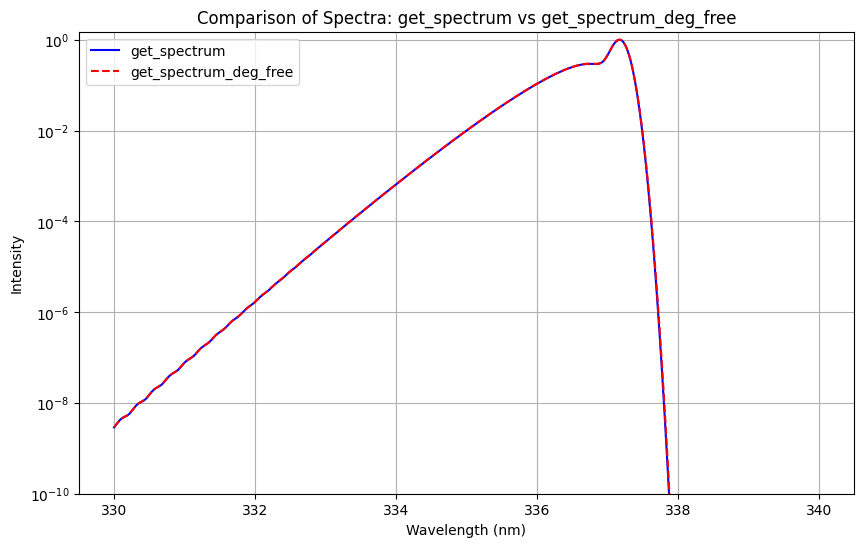

In [13]:
# Generate wavelengths
wavelengths = np.linspace(330, 340, 1000)  # nm

# Generate spectra
spectrum = sim.get_spectrum(wavelengths, T_rot=300, shape=sim.gaussian)
spectrum_deg_free = sim.get_spectrum_deg_free(wavelengths, T_rot=300, shape=sim.gaussian)

# Plot the spectra
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, spectrum, label="get_spectrum", color="blue")
plt.plot(wavelengths, spectrum_deg_free, label="get_spectrum_deg_free", color="red", linestyle="--")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.title("Comparison of Spectra: get_spectrum vs get_spectrum_deg_free")
plt.legend()
plt.yscale('log')
plt.ylim((1e-10, 1.5))
plt.grid()
plt.show()

In [14]:
score = utils.compute_score_fit(spectrum, spectrum_deg_free)
print("La différence entre les deux spectres au carré est de : ", score) # Autrement dit cela ne change quasiment rien de prende en compte la dégénérescence.

La différence entre les deux spectres au carré est de :  0.0013549383969008685


### <a id='toc1_6_4_'></a>[Whole spectrum](#toc0_)

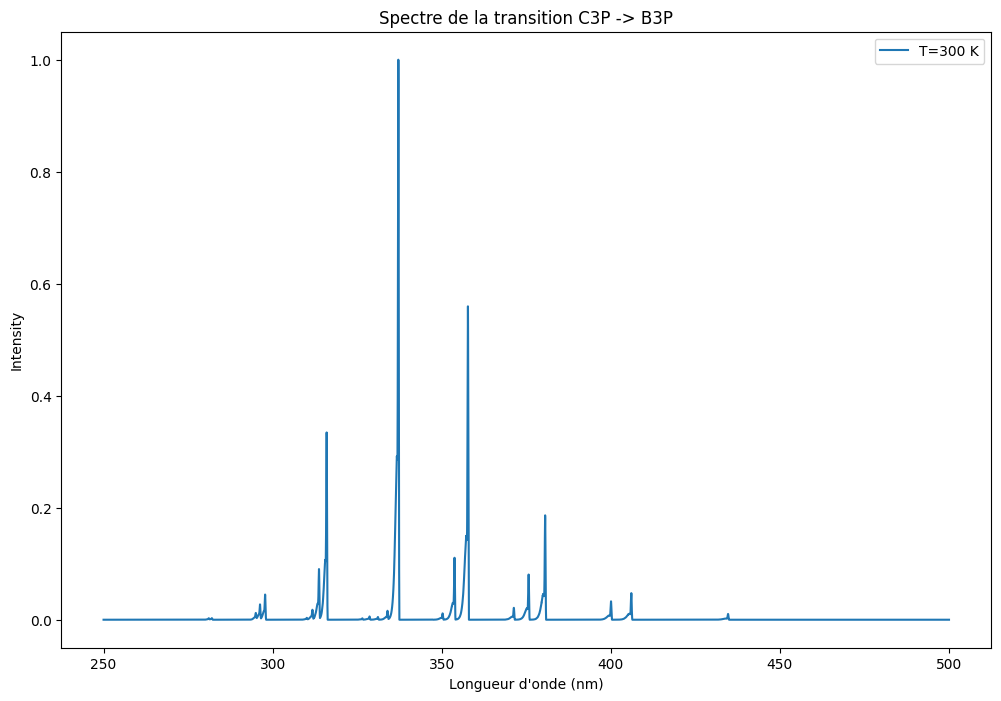

In [15]:
wavelengths = np.linspace(250, 500, 20_000) # nm

# On crée une figure pour tracer le spectre avec les probabilités
plt.figure(figsize=(12, 8))


plt.xlabel('Longueur d\'onde (nm)')
plt.ylabel('Intensity')
    


spectrum = sim.get_whole_spectrum(wavelengths, nb_vib_levels=5, nb_rot_levels=60, T_rot=300, T_vib=2_000, T_el=300, shape=sim.gaussian, relative_addition=5)    
epsilon = 1e-6  
plt.plot(wavelengths, np.clip(spectrum, epsilon, 1), label=f"T={300} K")    
    
plt.legend()
        

plt.title(f"Spectre de la transition C3P -> B3P")
# plt.yscale("log")
# plt.xlim((300, 350))
plt.savefig('./res/whole_spectrum_rot.png')
plt.show()

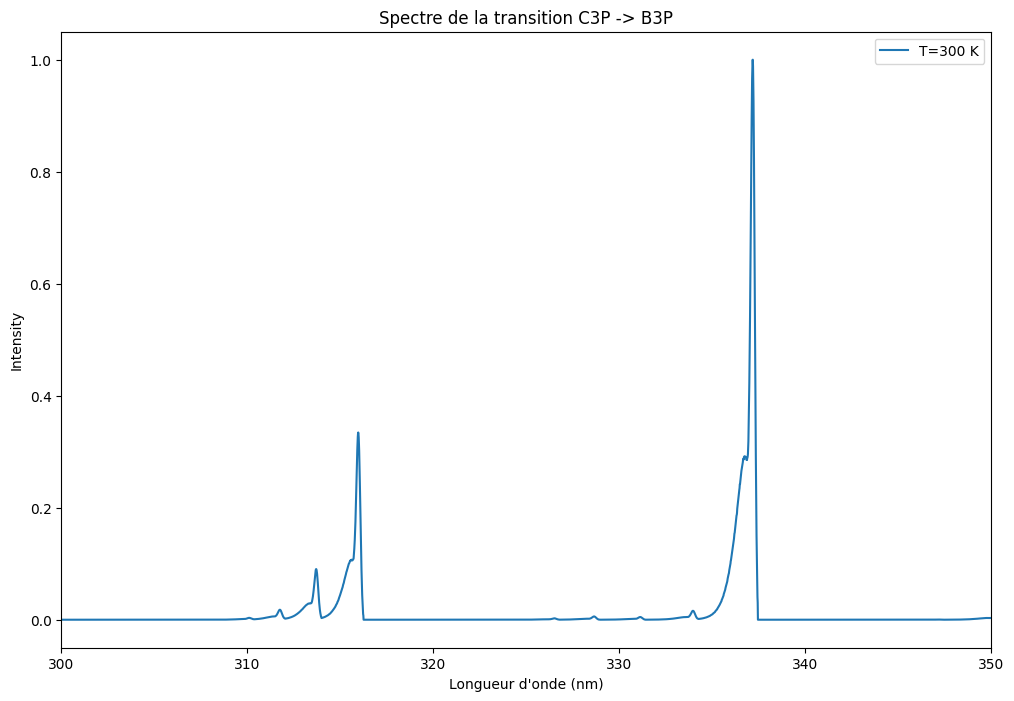

In [16]:
wavelengths = np.linspace(250, 500, 20_000) # nm

# On crée une figure pour tracer le spectre avec les probabilités
plt.figure(figsize=(12, 8))


plt.xlabel('Longueur d\'onde (nm)')
plt.ylabel('Intensity')
    


spectrum = sim.get_whole_spectrum(wavelengths, nb_vib_levels=5, nb_rot_levels=60, T_rot=300, T_vib=2_000, T_el=300, shape=sim.gaussian, relative_addition=5)    
epsilon = 1e-6  
plt.plot(wavelengths, np.clip(spectrum, epsilon, 1), label=f"T={300} K")    
    
plt.legend()
        

plt.title(f"Spectre de la transition C3P -> B3P")
# plt.yscale("log")
plt.xlim((300, 350))
plt.savefig('./res/rest_whole_spectrum_rot.png')
plt.show()